In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
def find_outliers(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)

    IQR = q3 - q1
    lower_bound = q1 - (1.5 * IQR)
    upper_bound = q3 + (1.5 * IQR)

    condition = (data[col] < lower_bound) |  (data[col] > upper_bound)
    outliers = data[condition]

    return outliers, condition

In [7]:
def replace_outliers(data, col, strategy='median'):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - (1.5 * IQR)
    upper_bound = q3 + (1.5 * IQR)

    condition = (data[col] < lower_bound) | (data[col] > upper_bound)
    outliers = data[condition]

    if strategy == 'mean':
        replace_value = data.loc[~condition, col].mean()
    elif strategy == 'median':
        replace_value = data.loc[~condition, col].median()

    data.loc[condition, col] = replace_value

    return data

In [8]:
glu_out, condition = find_outliers(data, 'Glucose')

In [9]:
glu_out

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


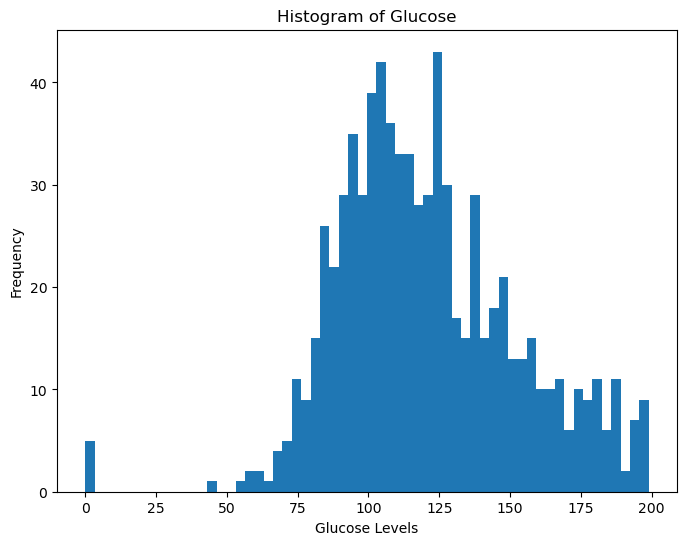

In [10]:
# Before Outliers imputation
plt.figure(figsize=(8, 6))
plt.title('Histogram of Glucose')
plt.hist(data['Glucose'], bins=60)
plt.xlabel('Glucose Levels')
plt.ylabel('Frequency')
plt.show()

In [11]:
data = replace_outliers(data, 'Glucose')

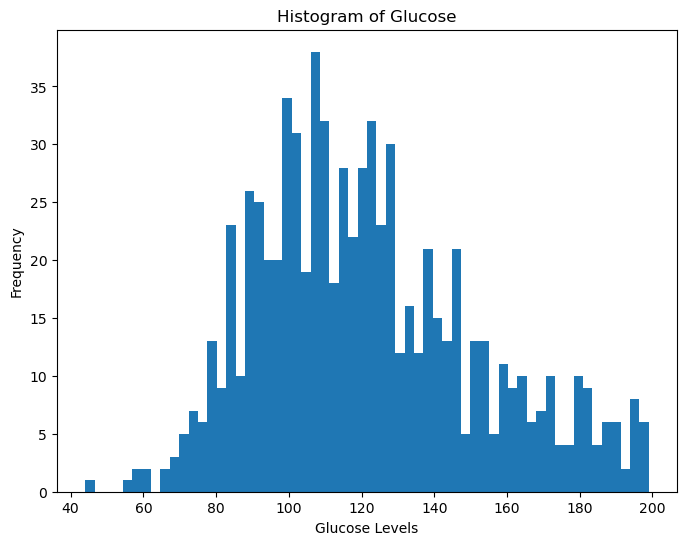

In [12]:
# After Outliers imputation
plt.figure(figsize=(8, 6))
plt.title('Histogram of Glucose')
plt.hist(data['Glucose'], bins=60)
plt.xlabel('Glucose Levels')
plt.ylabel('Frequency')
plt.show()

In [13]:
bp_out, bp_cond = find_outliers(data, 'BloodPressure')
bp_out.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
18,1,103,30,38,83,43.3,0.183,33,0
43,9,171,110,24,240,45.4,0.721,54,1
49,7,105,0,0,0,0.0,0.305,24,0


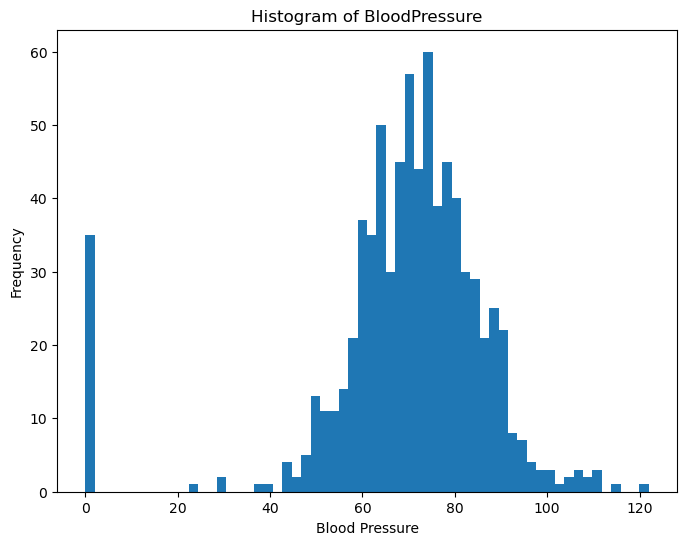

In [14]:
# Before outliers imputation
plt.figure(figsize=(8, 6))
plt.title('Histogram of BloodPressure')
plt.hist(data['BloodPressure'], bins=60)
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')
plt.show()

In [15]:
data = replace_outliers(data, 'BloodPressure')

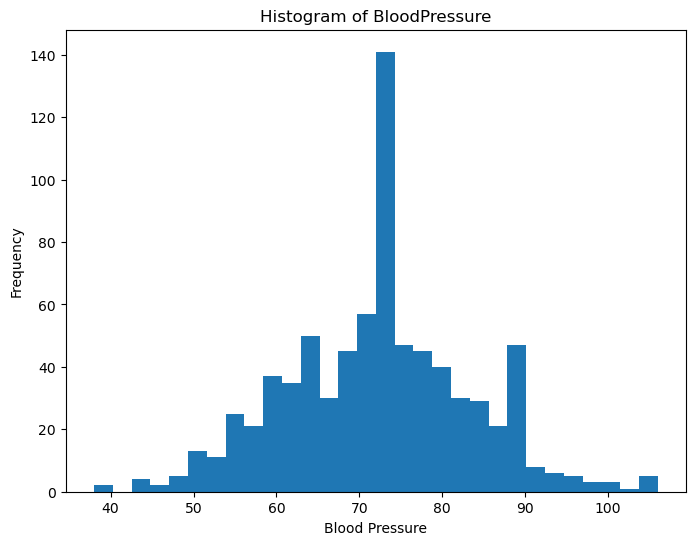

In [16]:
# After outliers imputation
plt.figure(figsize=(8, 6))
plt.title('Histogram of BloodPressure')
plt.hist(data['BloodPressure'], bins=30)
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')
plt.show()

In [17]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.196615,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.438286,11.146723,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,38.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,106.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
st_out, st_cond = find_outliers(data, 'SkinThickness')
st_out.head() # Skin Thickness got one outlier

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,2,197,70,99,0,34.7,0.575,62,1


In [19]:
# We can simply delete it
data = data[~st_cond]

In [20]:
in_out, in_cond = find_outliers(data, 'Insulin')
in_out.head() # multiple outliers exist

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
54,7,150,66,42,342,34.7,0.718,42,0
111,8,155,62,26,495,34.0,0.543,46,1
139,5,105,72,29,325,36.9,0.159,28,0


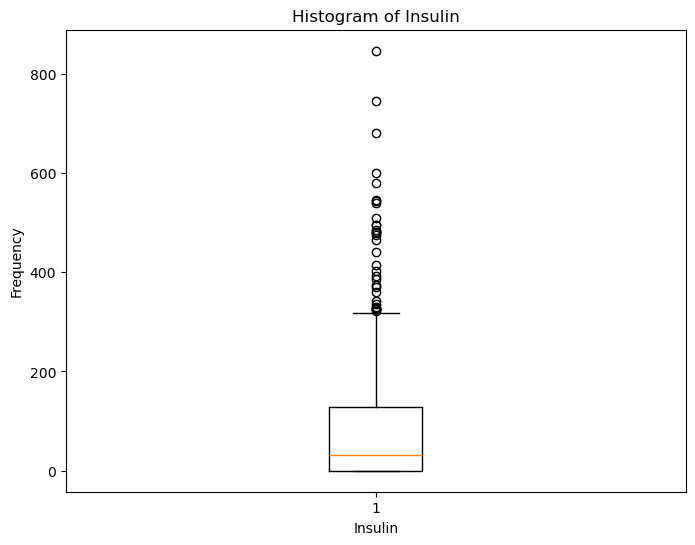

In [21]:
# Before the imputation of Insulin
plt.figure(figsize=(8, 6))
plt.title('Histogram of Insulin')
plt.boxplot(data['Insulin'])
plt.xlabel('Insulin')
plt.ylabel('Frequency')
plt.show()

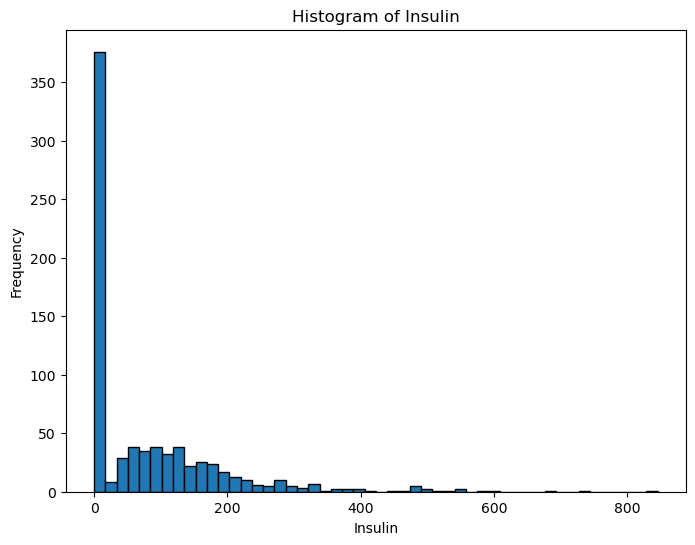

In [22]:
# Before the imputation of Insulin
plt.figure(figsize=(8, 6))
plt.title('Histogram of Insulin')
plt.hist(data['Insulin'], bins=50, edgecolor='k')
plt.xlabel('Insulin')
plt.ylabel('Frequency')
plt.show()

In [23]:
data = replace_outliers(data, 'BMI')

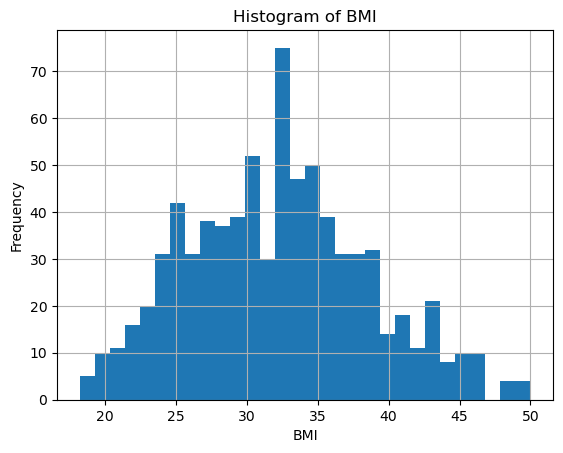

In [24]:
data['BMI'].hist(bins=30)
plt.title('Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

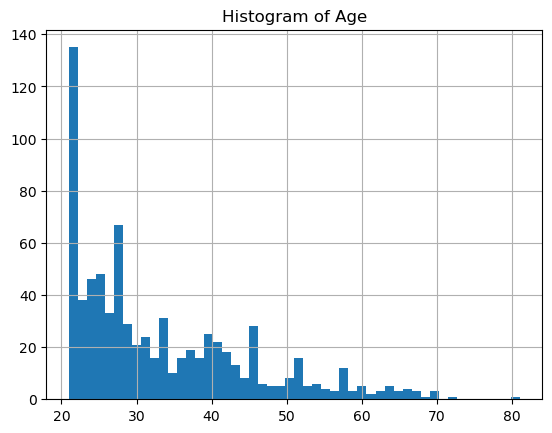

In [25]:
data['Age'].hist(bins=50)
plt.title('Histogram of Age')
plt.show()

In [26]:
data['Outcome'].value_counts()

Outcome
0    500
1    267
Name: count, dtype: int64

### Split the dataset

In [27]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.847458,121.558018,72.199478,20.434159,79.903520,32.195698,0.471742,33.203390,0.348110
std,3.371117,30.336089,11.153714,15.708524,115.283105,6.414104,0.331524,11.721879,0.476682
min,0.000000,44.000000,38.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.500000,64.000000,0.000000,0.000000,27.500000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.300000,0.626500,41.000000,1.000000
max,17.000000,199.000000,106.000000,63.000000,846.000000,50.000000,2.420000,81.000000,1.000000


### We only do this for continuous variables
data_norm = (data - data.mean()) / (data.max() - data.min())

In [28]:
X = data.drop('Outcome', axis=1)
y = data['Outcome'].astype('category')

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
lr = LogisticRegression()

In [32]:
y_train.value_counts()

Outcome
0    400
1    213
Name: count, dtype: int64

In [33]:
lr.fit(X_train, y_train)

/home/adars/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
y_pred = lr.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [35]:
y_test.values

[0, 0, 0, 1, 0, ..., 0, 0, 0, 1, 0]
Length: 154
Categories (2, int64): [0, 1]

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [37]:
acc = accuracy_score(y_pred, y_test)
acc

0.7207792207792207

In [38]:
report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.75      0.80       115
           1       0.46      0.64      0.54        39

    accuracy                           0.72       154
   macro avg       0.66      0.69      0.67       154
weighted avg       0.76      0.72      0.73       154



In [39]:
conf_matrix = confusion_matrix(y_pred, y_test)
conf_matrix

array([[86, 29],
       [14, 25]])

# Logistic Regression from Scratch

- **Initialize Parameters**: Randomly initialize weights and bias term.
- **Forward Propagation**:

    a) Calculate linear combination of features and weights i.e. Z = (X * W.T) + b.
  
    b) Apply the sigmoid function: A = sigmoid(Z)

- **Compute Loss**: Calculate the binary cross-entropy loss. Lower loss indicates better performance

- **Backward Propagation**: Compute the gradients of the loss with respect to weights and bias.
  
    a) dZ = A - Y

    b) dW = 1/m * (X.T * dZ)

    c) db = 1/m * sum(dZ)

- **Update Parameters**: Adjust the weights and bias using the computed gradients and a learning rate (α).
  
    a) W = W - (learning_rate * dW)

    b) b = b - (learning_rate * db)

In [40]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [41]:
def log_loss(y, y_hat):
    m = y.shape[0]
    epsilon = 1e-10  # To prevent log(0)
    loss = -1/m * (np.dot(y.T, np.log(y_hat + epsilon)) + np.dot((1 - y).T, np.log(1 - y_hat + epsilon)))
    return loss

In [42]:
# Forward and Backward propagation to adjust weights
def adjust_weight(X, Y, W, b, n_iter, learning_rate):
    m = X.shape[0]
    errors = []

    for i in range(n_iter):
        # Forward propagation
        Z = np.dot(X, W.T) + b
        A = sigmoid(Z)
        loss = log_loss(Y, A)  # Y = actual and A = predicted

        # Backward propagation
        dZ = A - Y
        dW = 1/m * np.dot(dZ.T, X)
        db = 1/m * np.sum(dZ)

        # Update parameters
        W = W - learning_rate * dW
        b = b - learning_rate * db

        if i % 100 == 0:
            errors.append(loss)
    
    return errors, W, b

In [43]:
def predict_value(X, W, b):
    Z = np.dot(X, W.T) + b
    return sigmoid(Z)

In [44]:
def logistic_regression(X_train, y_train, X_test, y_test, itern=1000, learning_rate=0.05):
    # Ensure the inputs are numpy arrays
    X_train = np.array(X_train)
    y_train = np.array(y_train).reshape(-1, 1)
    X_test = np.array(X_test)
    y_test = np.array(y_test).reshape(-1, 1)
    
    # Initialize weights (random)
    W = np.random.random((1, X_train.shape[1]))
    b = 0

    # Compute gradient descent
    err, W, b = adjust_weight(X_train, y_train, W, b, itern, learning_rate)

    # Calculate predicted values
    Y_pred_train = predict_value(X_train, W, b)
    Y_pred_test = predict_value(X_test, W, b)

    # Convert probabilities to class labels based on the threshold (0.5)
    Y_pred_train = (Y_pred_train > 0.5).astype(int)
    Y_pred_test = (Y_pred_test > 0.5).astype(int)

    # Actual values
    Y_train = y_train.reshape(y_train.shape[0], 1)
    Y_test = y_test.reshape(y_test.shape[0], 1)

    # Calculate accuracy
    training_acc = 100 - np.mean(np.abs(Y_pred_train - Y_train)) * 100
    test_acc = 100 - np.mean(np.abs(Y_pred_test - Y_test)) * 100

    print(f"Training accuracy: {training_acc:.4f} %")
    print(f"Test accuracy: {test_acc:.4f} %")

    result = {
        "errors": err,
        "Y_prediction_test": Y_pred_test,
        "Y_prediction_train": Y_pred_train,
        "W": W,
        "b": b,
        "learning_rate": learning_rate,
        "num_iterations": itern,
        "train_accuracy": training_acc,
        "test_accuracy": test_acc
    }

    return result

In [65]:
m1 = logistic_regression(X_train, y_train, X_test, y_test, learning_rate=0.0002)

Training accuracy: 67.3736 %
Test accuracy: 72.0779 %


In [71]:
len(np.array(m1['errors']).flatten())

10

In [82]:
pred_test = np.array(m1['Y_prediction_test']).flatten()

In [83]:
test = np.array(y_test)

In [84]:
df = pd.DataFrame({
    'Actual Test Values': test,
    'Prediction Values': pred_test
})

In [90]:
df['Result'] = df['Actual Test Values'] == df['Prediction Values']

In [93]:
df

,Actual Test Values,Prediction Values,Result
0,0,1,False
1,0,0,True
2,0,0,True
3,1,1,True
4,0,0,True
...,...,...,...
149,0,0,True
150,0,0,True
151,0,1,False
152,1,0,False


In [94]:
df['Result'].value_counts()

Result
True     111
False     43
Name: count, dtype: int64